In [1]:
import pandas as pd

In [2]:
def is_canonical(accession_list):
    can_prefix_list = "sp,NP,ENSP".split(",")
    for accession in accession_list:
        for can_prefix in can_prefix_list:
            if can_prefix in accession:
                return True
    return False

# def is_non_canonical(accessions):
#     non_prefix_list = "altorf,pseudo,ncRNA".split(",")
#     accession_list = accessions.split(",")
#     accession_group = 0
#     for accession in accession_list:
#         for non_prefix in non_prefix_list:
#             if non_prefix in accession:
#                 accession_group += 1
#     return len(list) == accession_group
def is_non_canonical(accession_list):
    non_prefix_list = "altorf,pseudo,ncRNA".split(",")
    for accession in accession_list:
        for non_prefix in non_prefix_list:
            if non_prefix in accession:
                return True
    return False

def is_mutation(accession_list):
    for accession in accession_list:
        if "COSMIC" in accession or "cbiomut" in accession:
            return True
    return False

In [3]:
def is_group(accessions):
    accession_list = accessions.split(",")
    if is_canonical(accession_list):
        return "canonical"
    elif is_non_canonical(accession_list):
        return "non_canonical"
    elif is_mutation(accession_list):
        return "mutation"
    else:
        return "others"

In [4]:
file = open("E:\蛋白质基因组学\project\PXD014145\out\lfq_out.mzTab", "r")
list = file.readlines()
psm = []
mtd_dict = dict()
for i in list:
    i = i.strip("\n")
    row_list = i.split('\t')
    if row_list[0] == "MTD":
        mtd_dict[row_list[1]] = row_list[2]
    elif row_list[0] == "PSH":
        psm_cols = row_list
    elif row_list[0] == "PSM":
        psm.append(row_list)
lfq_out = pd.DataFrame(psm, columns=psm_cols, dtype='str')

In [5]:
lfq_out

,PSH,sequence,PSM_ID,accession,unique,database,database_version,search_engine,search_engine_score[1],modifications,...,calc_mass_to_charge,spectra_ref,pre,post,start,end,opt_global_Posterior_Error_Probability_score,opt_global_q-value,opt_global_cv_MS:1002217_decoy_peptide,opt_global_cv_MS:1000889_peptidoform_sequence
0,PSM,TRQCFCDGCC,0,DECOY_altorf_ENST00000517392.6_2_codon_218,1,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072868735287215,"4-UNIMOD:4,6-UNIMOD:4,9-UNIMOD:4,10-UNIMOD:4",...,682.235952670871143,ms_run[9]:controllerType=0 controllerNumber=1 ...,R,-,52,61,1.0,0.059982727486849,1,TRQC(Carbamidomethyl)FC(Carbamidomethyl)DGC(Ca...
1,PSM,VHILIL,1,"DECOY_altorf_ENST00000265077.8_3_codon_82,DECO...",0,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072868735287215,0-UNIMOD:737,...,468.825816955670973,ms_run[7]:controllerType=0 controllerNumber=1 ...,"K,K,K","-,-,-","38,38,38","43,43,43",1.0,0.058837811589511,1,.(TMT6plex)VHILIL
2,PSM,GLIKIRNSG,2,"ncRNA_ENST00000672237.1_2_codon_14,ncRNA_ENST0...",0,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.05441107667115,null,...,479.295635678970996,ms_run[11]:controllerType=0 controllerNumber=1...,"-,-","-,-","1,1","9,9",0.874949,0.051826337712272,0,GLIKIRNSG
3,PSM,MGCCGCGSCGCSGG,3,"ENSP00000497463.1_codon_1,altorf_ENST000006493...",0,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072868735287215,"0-UNIMOD:1,3-UNIMOD:4,4-UNIMOD:4,6-UNIMOD:4,9-...",...,754.711127916820942,ms_run[9]:controllerType=0 controllerNumber=1 ...,"-,-","-,-","1,1","14,14",1.0,0.059982727486849,0,.(Acetyl)MGC(Carbamidomethyl)C(Carbamidomethyl...
4,PSM,KPLIVPKK,4,ncRNA_ENST00000460378.1_1_codon_10,1,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.064752450998048,0-UNIMOD:1,...,482.83132229062096,ms_run[7]:controllerType=0 controllerNumber=1 ...,-,F,1,8,0.933128,0.057575018297146,0,.(Acetyl)KPLIVPKK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150848,PSM,EDKDKNKEKIPRKMLSRDSSQEYTDSTGIDLHEFLVNTLK,150848,"ENSP00000317903.6,ENSP00000385839.1,ENSP000004...",0,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.038525712489993,null,...,785.570847181587737,ms_run[12]:controllerType=0 controllerNumber=1...,"K,K,K,K,K,K,K,K,K,K,K,K,K,K","K,K,K,K,K,K,K,K,K,K,K,K,K,K","124,124,132,124,12,124,131,254,254,196,139,12,...","163,163,171,163,51,163,170,293,293,235,178,51,...",0.772822,0.024788116285428,0,EDKDKNKEKIPRKMLSRDSSQEYTDSTGIDLHEFLVNTLK
150849,PSM,HSSERNSRKQTQRNTEIVSFLNYKHGPSESQHDMLLVK,150849,"ncRNA_ENST00000606388.6_1_codon_45,ncRNA_ENST0...",0,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.041331178262586,"34-UNIMOD:35,38-UNIMOD:737",...,788.573892655004215,ms_run[12]:controllerType=0 controllerNumber=1...,"K,K,K,K","E,E,E,E","16,16,16,16","53,53,53,53",0.802098,0.046925708271204,0,HSSERNSRKQTQRNTEIVSFLNYKHGPSESQHDM(Oxidation)L...
150850,PSM,HSSERNSRKQTQRNTEIVSFLNYKHGPSESQHDMLLVK,150850,"ncRNA_ENST00000606388.6_1_codon_45,ncRNA_ENST0...",0,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.041331178262586,"34-UNIMOD:35,38-UNIMOD:737",...,676.064376056685205,ms_run[12]:controllerType=0 controllerNumber=1...,"K,K,K,K","E,E,E,E","16,16,16,16","53,53,53,53",0.802098,0.046925708271204,0,HSSERNSRKQTQRNTEIVSFLNYKHGPSESQHDM(Oxidation)L...
150851,PSM,TALLDAAGVASLLTTAEVVVTEIPK,150851,"ENSP00000373620.3,ENSP00000503139.1,ENSP000005...",0,PXD014145-A549-complete_decoy,null,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",1.840332732157974e-05,25-UNIMOD:737,...,904.52631605437125,ms_run[12]:controllerType=0 controllerNumber=1...,"R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R","E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E","527,527,527,527,527,527,527,527,527,547,527,55...","551,551,

In [6]:
lfq_out.loc[:,"group"] = lfq_out.apply(lambda x: is_group(x["accession"]), axis=1)

In [7]:
lfq_out["group"].value_counts()

canonical        127344
non_canonical     22421
others              604
mutation            484
Name: group, dtype: int64

In [8]:
def compute_global_fdr(df_psms, order):
    df_psms.sort_values("search_engine_score[1]", ascending=order, inplace=True)
    df_psms['FDR'] = (range(1, len(df_psms) + 1) / df_psms['target'].cumsum()) - 1
    df_psms['q-value'] = df_psms['FDR'][::-1].cummin()[::-1]

    df_psms.sort_values("search_engine_score[1]", ascending=order, inplace=True)

    return df_psms
def is_decoy(accessions):
    list = accessions.split(',')
    if all("DECOY" in accession for accession in list):
        return 0
    else:
        return 1
def is_groups(peptide_group_members, accessions):
    accession_group = 0
    list = accessions.split(',')
    for accession in list:
        for class_peptide in peptide_group_members:
            if class_peptide in accession:
                accession_group += 1
    return len(list) == accession_group
peptide_groups_prefix = {'non_canonical': ['altorf', 'pseudo','ncRNA'],'mutations': ['COSMIC', 'cbiomut'],'variants': ['var_mut', 'var_rs']}
def compute_class_fdr(df_psms,order):
    ls = []
    for c in peptide_groups_prefix:
        # split the dataframe and save the subset
        currClass = df_psms[
            df_psms['accession'].apply(lambda x: is_groups(peptide_groups_prefix[c], x))]
        ls.append(currClass)

        # If there is no decoy to throw an exception
        if len(currClass[currClass["target"] == 0 ]) == 0:
            # raise ValueError(
            #     "There is not enough decoys to calculate " + c +" class-fdr.")
            print("Warning:There is no peptide or decoy of "+c+", and this kind of class-fdr has been skipped.")

        # calculate class-specific q-value
        currClass.sort_values("search_engine_score[1]", ascending=order, inplace=True)
        FDR = (range(1, len(currClass["target"]) + 1) / currClass["target"].cumsum()) - 1
        currClass['class-specific-q-value'] = FDR[::-1].cummin()[::-1]
    df = pd.concat(ls)

    # df_psms['class-specific-q-value'] = df['class-specific-q-value']
    df_psms = df_psms.merge(df['class-specific-q-value'], left_index=True, right_index=True, how='left')
    df_psms.loc[df_psms['class-specific-q-value'].isnull(), 'class-specific-q-value'] = df_psms['q-value']
    df_psms.sort_values("search_engine_score[1]", ascending=order, inplace=True)

    return df_psms

In [9]:
lfq_out.loc[:,"target"] = lfq_out.apply(lambda x: is_decoy(x["accession"]), axis=1)
global_fdr_out = compute_global_fdr(lfq_out, order=False)
class_fdr_out = compute_class_fdr(global_fdr_out, order=False)
global_fdr_out = global_fdr_out[(global_fdr_out['q-value'] < 0.01)]
class_fdr_out = class_fdr_out[(class_fdr_out['class-specific-q-value'] < 0.01)& (class_fdr_out['class-specific-q-value'] < 0.01)]

E:\fork\SpectrumAI-master\venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
E:\fork\SpectrumAI-master\venv\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
global_fdr_out["group"].value_counts()

canonical        119759
non_canonical      4781
others              567
mutation            465
Name: group, dtype: int64

In [11]:
class_fdr_out["group"].value_counts()

canonical        119759
others              567
mutation            484
non_canonical         1
Name: group, dtype: int64

In [12]:
blast_out = pd.read_table(r"E:\蛋白质基因组学\project\PXD014145\out\blast_out.tsv", header=0, sep="\t")

In [13]:
blast_out["position"].value_counts()

canonical        120480
non-canonical       208
4                    37
3                    34
5                    31
6                    29
1                    28
2                    27
7                    17
9                    12
8                     5
11                    4
10                    3
12                    2
13                    1
15                    1
Name: position, dtype: int64

In [14]:
def is_mutation_or_others(accession_list):
    for accession in accession_list:
        if "COSMIC" in accession or "cbiomut" in accession:
            return "mutation"
    else:
        return "others"

In [15]:
blast_out.loc[:, "group"] = blast_out.apply(lambda x: "non_canonical" if x["position"]=="non-canonical" else("canonical" if x["position"]=="canonical" else is_mutation_or_others(x["accession"].split(","))) , axis=1)
blast_out["group"].value_counts()

canonical        120480
others              222
non_canonical       208
mutation              9
Name: group, dtype: int64

In [16]:
blast_out[blast_out["group"]=="others"]

,PSH,sequence,PSM_ID,accession,unique,database,database_version,search_engine,search_engine_score[1],modifications,...,opt_global_cv_MS:1002217_decoy_peptide,opt_global_cv_MS:1000889_peptidoform_sequence,SpecFile,ScanNum,target,FDR,q-value,class-specific-q-value,position,group
1921,PSM,GPNHAVVSR,3576,"Q0IIK2,Q29443",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000058,0-UNIMOD:737,...,0,.(TMT6plex)GPNHAVVSR,MFA385.mzML,2444,1,0.037890,0.009954,0.009954,1,others
2611,PSM,MCQSTR,4596,ENSEMBL:ENSBTAP00000007350,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.002685,"0-UNIMOD:737,2-UNIMOD:4",...,0,.(TMT6plex)MC(Carbamidomethyl)QSTR,MFA386.mzML,2764,1,0.018368,0.009954,0.009954,1,others
2612,PSM,MCQSTR,4596,ENSEMBL:ENSBTAP00000007350,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.002685,"0-UNIMOD:737,2-UNIMOD:4",...,0,.(TMT6plex)MC(Carbamidomethyl)QSTR,MFA386.mzML,2764,1,0.018368,0.009954,0.009954,3,others
2613,PSM,MCQSTR,4596,ENSEMBL:ENSBTAP00000007350,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.002685,"0-UNIMOD:737,2-UNIMOD:4",...,0,.(TMT6plex)MC(Carbamidomethyl)QSTR,MFA386.mzML,2764,1,0.018368,0.009954,0.009954,2,others
2614,PSM,MCQSTR,4596,ENSEMBL:ENSBTAP00000007350,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.002685,"0-UNIMOD:737,2-UNIMOD:4",...,0,.(TMT6plex)MC(Carbamidomethyl)QSTR,MFA386.mzML,2764,1,0.018368,0.009954,0.009954,6,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104976,PSM,EVLLQTFLDDTSPGDK,125119,ENSEMBL:ENSBTAP00000032840,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000049,"0-UNIMOD:737,16-UNIMOD:737",...,0,.(TMT6plex)EVLLQTFLDDTSPGDK(TMT6plex),MFA390.mzML,24556,1,0.027626,0.009954,0.009954,11,others
107808,PSM,VELEVPQLCNFILK,128183,ENSEMBL:ENSBTAP00000032840,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,"0-UNIMOD:737,9-UNIMOD:4,14-UNIMOD:737",...,0,.(TMT6plex)VELEVPQLC(Carbamidomethyl)NFILK(TMT...,MFA381.mzML,25421,1,0.013025,0.009954,0.009954,10,others
110683,PSM,VFQPFFVELTMPYSVIR,131327,ENSEMBL:ENSBTAP00000024146,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,"0-UNIMOD:737,11-UNIMOD:35",...,0,.(TMT6plex)VFQPFFVELTM(Oxidation)PYSVIR,MFA387.mzML,26255,1,0.013633,0.009954,0.009954,1,others
110708,PSM,VFQPFFVELTMPYSVIR,131354,ENSEMBL:ENSBTAP00000024146,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000036,"0-UNIMOD:737,11-UNIMOD:35",...,0,.(TMT6plex)VFQPFFVELTM(Oxidation)PYSVIR,MFA386.mzML,26159,1,0.017745,0.009954,0.009954,1,others


In [17]:
blast_out[blast_out["group"]=="mutation"]

,PSH,sequence,PSM_ID,accession,unique,database,database_version,search_engine,search_engine_score[1],modifications,...,opt_global_cv_MS:1002217_decoy_peptide,opt_global_cv_MS:1000889_peptidoform_sequence,SpecFile,ScanNum,target,FDR,q-value,class-specific-q-value,position,group
29347,PSM,WEVEEMKDSK,39153,"COSMIC:CANX:p.E111D:Substitution-Missense,COSM...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.002527,"0-UNIMOD:737,6-UNIMOD:35,7-UNIMOD:737",...,0,.(TMT6plex)WEVEEM(Oxidation)K(TMT6plex)DSK,MFA385.mzML,10407,1,0.018363,0.009954,0.0,8,mutation
30057,PSM,KFPVTENSEGYK,40030,"COSMIC:NAMPT:p.K339E:Substitution-Missense,cbi...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,"0-UNIMOD:737,1-UNIMOD:737",...,0,.(TMT6plex)K(TMT6plex)FPVTENSEGYK,MFA391.mzML,9310,1,0.011077,0.009954,0.0,9,mutation
41413,PSM,KFPVTENSEGYK,53446,"COSMIC:NAMPT:p.K339E:Substitution-Missense,cbi...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,"0-UNIMOD:737,1-UNIMOD:737,12-UNIMOD:737",...,0,.(TMT6plex)K(TMT6plex)FPVTENSEGYK(TMT6plex),MFA380.mzML,12566,1,0.012339,0.009954,0.0,9,mutation
48712,PSM,TQIAICPNNHELHIYEK,61937,COSMIC:AC004922.1:p.V364L:Substitution-Missense,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,"0-UNIMOD:737,6-UNIMOD:4,17-UNIMOD:737",...,0,.(TMT6plex)TQIAIC(Carbamidomethyl)PNNHELHIYEK(...,MFA389.mzML,13769,1,0.012363,0.009954,0.0,12,mutation
54216,PSM,WEVEEMKDSK,68242,"COSMIC:CANX:p.E111D:Substitution-Missense,COSM...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000049,"0-UNIMOD:737,7-UNIMOD:737,10-UNIMOD:737",...,0,.(TMT6plex)WEVEEMK(TMT6plex)DSK(TMT6plex),MFA388.mzML,14946,1,0.018527,0.009954,0.0,8,mutation
88351,PSM,VSLLFEDDVDSR,106504,cbiomut:ENST00000358474:FAM21B:p.K340R:Missens...,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,0-UNIMOD:737,...,0,.(TMT6plex)VSLLFEDDVDSR,MFA388.mzML,21394,1,0.017667,0.009954,0.0,12,mutation
107196,PSM,ASVETVDPASLWEY,127526,"COSMIC:FSCN1:p.A482V:Substitution-Missense,cbi...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000049,0-UNIMOD:737,...,0,.(TMT6plex)ASVETVDPASLWEY,MFA385.mzML,25463,1,0.030141,0.009954,0.0,3,mutation
107198,PSM,ASVETVDPASLWEY,127528,"COSMIC:FSCN1:p.A482V:Substitution-Missense,cbi...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000077,0-UNIMOD:737,...,0,.(TMT6plex)ASVETVDPASLWEY,MFA385.mzML,25487,1,0.045552,0.009954,0.0,3,mutation
108054,PSM,IWELLQQMER,128448,COSMIC:LANCL1_ENST00000450366:p.R41W:Substitut...,0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000049,0-UNIMOD:737,...,0,.(TMT6plex)IWELLQQMER,MFA383.mzML,25680,1,0.028921,0.009954,0.0,2,mutation


In [18]:
validate_out = pd.read_table(r"E:\蛋白质基因组学\project\PXD014145\out\validate_out.tsv", header=0, sep="\t")

In [19]:
validate_out

,Unnamed: 0,PSH,sequence,PSM_ID,accession,unique,database,database_version,search_engine,search_engine_score[1],...,sum.supportions.intensity,flanking_ions_support,flanking_ions,sum.flanking.ions.intensity,matched_ions,sum.matchedions.intensity,sum.fragmentions.intensity,maxintensity,average_intensity,median_intensity
0,0,PSM,ANMQHR,127,"ENSP00000349573.4,ENSP00000348345.3,ENSP000003...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.004231,...,0.0,NO,NaN,0.0,"y1,b1,y2,b2,y3",6.848372e+04,2.525942e+05,2.026745e+04,2775.760986,1009.835815
1,1,PSM,NNEHHEK,360,"ENSP00000363435.4,ENSP00000475177.1,altorf_ENS...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.007118,...,0.0,NO,NaN,0.0,"b1,y1,y2,b3,y3",1.339221e+04,1.010004e+05,1.515550e+04,2020.007935,766.416565
2,2,PSM,KHDNEGSGSK,367,"ENSP00000353192.3,ENSP00000352257.4,ENSP000003...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000597,...,0.0,NO,NaN,0.0,"b1,y1,y2,y3,y4,b3,y5,y6",1.584263e+04,6.593754e+04,7.884899e+03,1318.750732,746.210815
3,3,PSM,SAHQVAR,404,"ENSP00000334983.5,altorf_ENST00000335181.10_2_...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.003335,...,0.0,NO,NaN,0.0,"y1,y2,b1,y3,b2,y4,b3",2.403469e+04,1.517781e+05,2.350671e+04,2335.047852,1024.968506
4,4,PSM,HGHSYCSSQGCER,417,"ENSP00000366243.4,altorf_ENST00000377044.9_2_c...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.004522,...,0.0,NO,NaN,0.0,"y1,b2,y3,y4,b3,y5",1.113118e+04,9.008076e+04,6.547813e+03,1580.364136,924.909973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120914,120914,PSM,YIPPHLR,150845,"ENSP00000494040.1,ENSP00000487224.1,ENSP000004...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000632,...,0.0,NO,NaN,0.0,"y1,y2,b1,y3,b2,y4,y5",4.356785e+05,1.258819e+06,1.354733e+05,8227.573242,2542.960449
120915,120915,PSM,YPPSPAK,150846,"ENSP00000388469.1,ENSP00000411821.2,ENSP000002...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.001921,...,0.0,NO,NaN,0.0,"y1,b1,y2,b2,y3,y4,b4,y5,y6",2.932468e+06,1.107792e+07,1.033157e+06,91553.078125,15023.042969
120916,120916,PSM,YVAVMPPHIGDQPLTGAYTVTLDGR,150847,"ENSP00000263368.3,altorf_ENST00000263368.9_1_c...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,...,0.0,NO,NaN,0.0,"y1,y2,y3,b1,y4,b2,y5,b3,y6,b4,y7,b5,b6,y8,y9,y...",1.453927e+06,4.346153e+06,3.609143e+05,10892.614258,2471.157959
120917,120917,PSM,TALLDAAGVASLLTTAEVVVTEIPK,150851,"ENSP00000373620.3,ENSP00000503139.1,ENSP000005...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,...,0.0,NO,NaN,0.0,"b1,b2,b3,y1,b4,y2,b5,b6,y3,b7,b8,y4,b9,y5,b10,...",3.675777e+05,1.063124e+06,1.794571e+05,4562.762207,1547.597778


In [20]:
validate_out["status"].value_counts()

skiped     120688
checked       231
Name: status, dtype: int64

In [21]:
validate_out["flanking_ions_support"].value_counts()

NO     120690
YES       229
Name: flanking_ions_support, dtype: int64

In [22]:
df = pd.DataFrame(data=[lfq_out["group"].value_counts(),global_fdr_out["group"].value_counts(),class_fdr_out["group"].value_counts(),blast_out["group"].value_counts()],
               index=['lfq_out','global_fdr_out','class_fdr_out','blast_out'],
               columns=['canonical','non_canonical','mutation','others']
              )
df

,canonical,non_canonical,mutation,others
lfq_out,127344,22421,484,604
global_fdr_out,119759,4781,465,567
class_fdr_out,119759,1,484,567
blast_out,120480,208,9,222


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

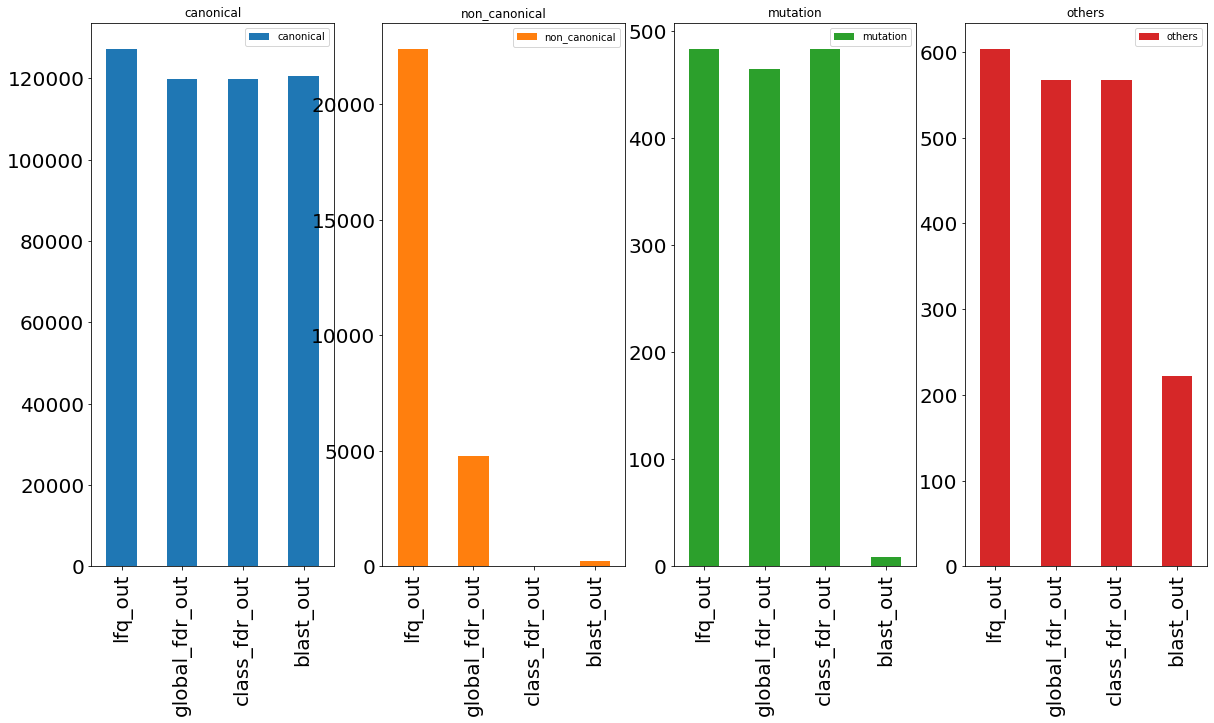

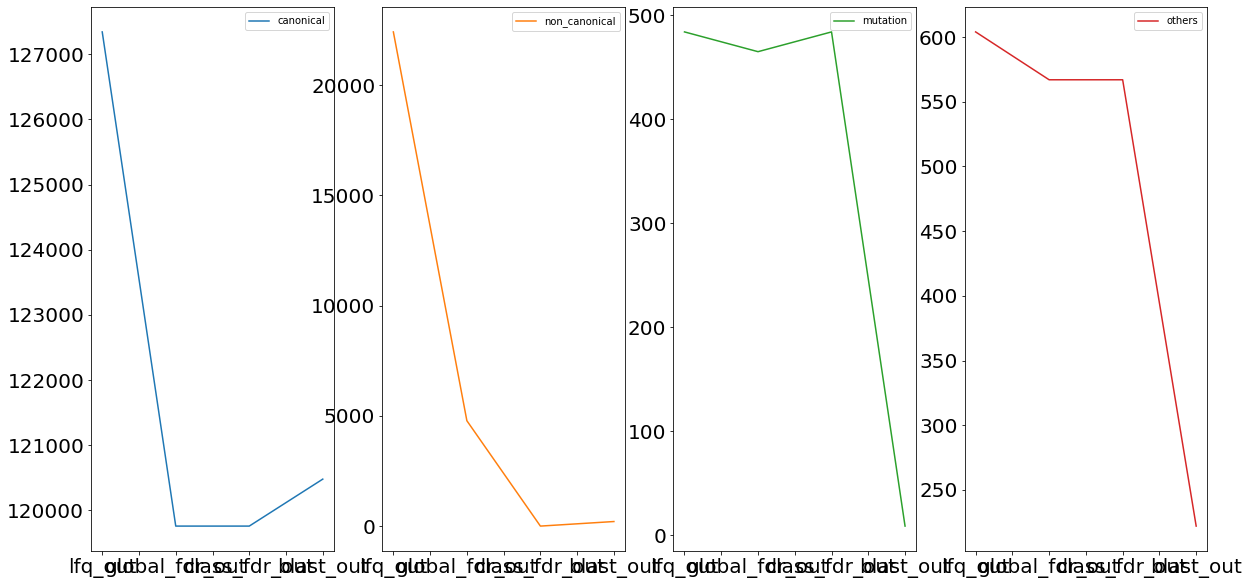

In [23]:
df.plot(kind='bar',fontsize=20,subplots = True,layout = (1,4),figsize = (20,10))
df.plot(kind='line',fontsize=20,subplots = True,layout = (1,4),figsize = (20,10))

In [24]:
validate_out = pd.read_table(r"E:\蛋白质基因组学\project\PXD014145\out\validate_out.tsv", header=0, sep="\t")

In [25]:
validate_out["status"].value_counts()

skiped     120688
checked       231
Name: status, dtype: int64

In [26]:
validate_out["flanking_ions_support"].value_counts()

NO     120690
YES       229
Name: flanking_ions_support, dtype: int64

In [27]:
before_validate_saavs = validate_out[validate_out["status"]=="checked"]
before_validate_saavs.loc[:, "group"] = before_validate_saavs.apply(lambda x: is_group(x["accession"]), axis=1)
before_validate_saavs["group"].value_counts()

E:\fork\SpectrumAI-master\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


others           216
mutation           9
non_canonical      6
Name: group, dtype: int64

In [28]:
after_validate_saavs = validate_out[validate_out["flanking_ions_support"]=="YES"]
after_validate_saavs.loc[:, "group"] = after_validate_saavs.apply(lambda x: is_group(x["accession"]), axis=1)
after_validate_saavs["group"].value_counts()

others           216
mutation           9
non_canonical      4
Name: group, dtype: int64

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

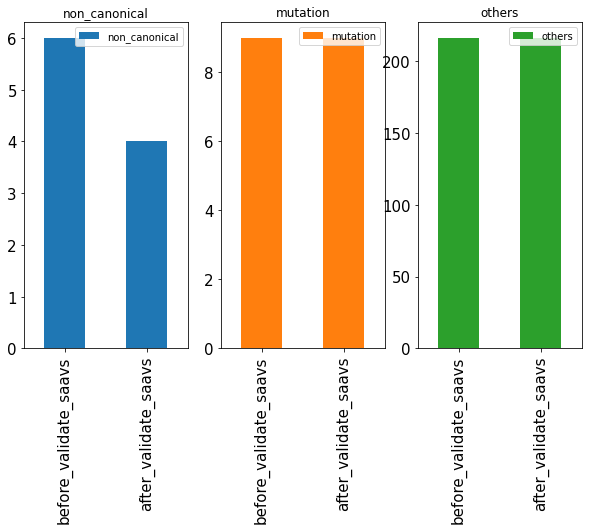

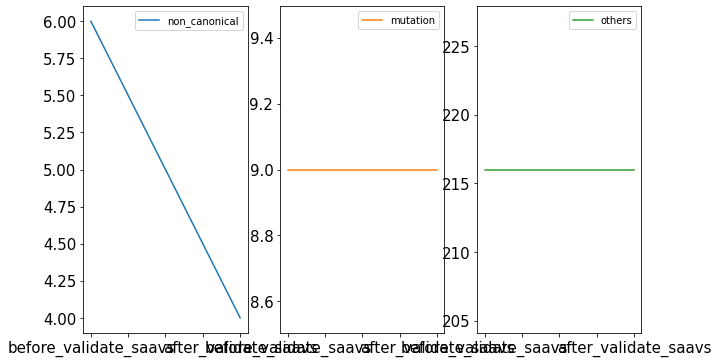

In [29]:
df_saav = pd.DataFrame(data=[before_validate_saavs["group"].value_counts(), after_validate_saavs["group"].value_counts()],
                  index=['before_validate_saavs', 'after_validate_saavs'],
                  columns=['non_canonical', 'mutation', 'others']
                  )
df_saav
df_saav.plot(kind='bar', fontsize=15, subplots=True, layout=(1, 3), figsize=(10, 6))
df_saav.plot(kind='line', fontsize=15, subplots=True, layout=(1, 3), figsize=(10, 6))